# Analyse and run models using FerPlus dataset

In this notebook we are going to build, test, analyze and compare the model with the previous versions. This is followed by improvements to the model and the data. We run this cycle a few times until we achieve realistic and nice results.

This model has been build in [this](https://github.com/BB8-2020/EmpathicRobot/tree/main/models/classification_model) file. 

If you have any quesentions about this notebook, send us a mail at maria.dukmak@student.hu.nl

In [1]:
# To read the data 
import _pickle as cPickle
import bz2
# To creat the model
from tensorflow.keras import Sequential

# Import the file with the model functions
import sys
# You need to change this path to your project path
sys.path.append('/Users/storm/OneDrive/Documenten/HU/Jaar_2/BB8/EmpathicRobot')
from conv_model import *
from models.functions import *

## Read data
As we have done before, our data is ready to use. In this section we will use **ferPlus** to train the model. This data has already been read, prepared and stored in **hier linkje zetten** this file. For now, our data is in a pickel file that we will read as follows:

For simplicity, we set up the path to the data as follows, you can also set it to your own path.

In [2]:
os.chdir(os.getcwd() + '/data/')

We immediately split the data into train, test and validation set.

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = read_data(str('ferPlus_processed'))

As we see, the data consists of train set that contains 80% of the data. The validation and the test set are equal in size 20% and are used to subsequently test the model.

This data has already been cleaned and normalized so we don't have to do anything with the data anymore.

In [4]:
print(f"Train set: X_train shape:{x_train.shape} Y_train shape:{y_train.shape}")

print(f"Test set: X_test shape:{x_test.shape} Y_test shape:{y_test.shape}")

print(f"Validation set: X_val shape:{x_val.shape} Y_val shape:{y_val.shape}")

Train set: X_train shape:(28390, 48, 48, 1) Y_train shape:(28390, 7)
Test set: X_test shape:(3549, 48, 48, 1) Y_test shape:(3549, 7)
Validation set: X_val shape:(3549, 48, 48, 1) Y_val shape:(3549, 7)


## Models

In [5]:
# We create all the models that we got 
models = build_models(input_shape=(48, 48, 1), num_classes=7)

### Model version 1 

Now it is finally time to start working on the model. We are going to start with the following model:

In [6]:
model1 = Sequential(models[0]['layers'], name = models[0]['name'])

Let's check the summary out:

In [7]:
model1.summary()

Model: "Version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 128)       51

Looks good, time to compile!

### Compile and train

To compile the model we use Adam optimaizer and binary crossentropy as los function. Let us now train the model.

In [8]:
compile_model(model1)

In [9]:
# to do: set epoches to 100
history = fit_model(model1, 64, 100, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/100
443/443 - 14s - loss: 0.3215 - accuracy: 0.5143 - val_loss: 0.3574 - val_accuracy: 0.3959
Epoch 2/100
443/443 - 11s - loss: 0.2712 - accuracy: 0.6307 - val_loss: 0.2742 - val_accuracy: 0.6176
Epoch 3/100
443/443 - 10s - loss: 0.2464 - accuracy: 0.6926 - val_loss: 0.2475 - val_accuracy: 0.6850
Epoch 4/100
443/443 - 10s - loss: 0.2273 - accuracy: 0.7418 - val_loss: 0.2408 - val_accuracy: 0.6988
Epoch 5/100
443/443 - 10s - loss: 0.2117 - accuracy: 0.7871 - val_loss: 0.2405 - val_accuracy: 0.7112
Epoch 6/100
443/443 - 10s - loss: 0.1981 - accuracy: 0.8240 - val_loss: 0.2308 - val_accuracy: 0.7411
Epoch 7/100
443/443 - 42s - loss: 0.1873 - accuracy: 0.8510 - val_loss: 0.2351 - val_accuracy: 0.7337
Epoch 8/100
443/443 - 11s - loss: 0.1786 - accuracy: 0.8756 - val_loss: 0.2301 - val_accuracy: 0.7396
Epoch 9/100
443/443 - 10s - loss: 0.1728 - accuracy: 0.8888 - val_loss: 0.2305 - val_accuracy: 0.7394
Epoch 10/100
443/443 - 11s - loss: 0.1681 - accuracy: 0.8980 - val_loss: 0.2258 - 

Epoch 81/100
443/443 - 10s - loss: 0.1359 - accuracy: 0.9614 - val_loss: 0.2651 - val_accuracy: 0.7732
Epoch 82/100
443/443 - 11s - loss: 0.1360 - accuracy: 0.9642 - val_loss: 0.2727 - val_accuracy: 0.7768
Epoch 83/100
443/443 - 10s - loss: 0.1354 - accuracy: 0.9644 - val_loss: 0.2593 - val_accuracy: 0.7751
Epoch 84/100
443/443 - 10s - loss: 0.1354 - accuracy: 0.9638 - val_loss: 0.2725 - val_accuracy: 0.7732
Epoch 85/100
443/443 - 10s - loss: 0.1354 - accuracy: 0.9650 - val_loss: 0.2716 - val_accuracy: 0.7757
Epoch 86/100
443/443 - 10s - loss: 0.1359 - accuracy: 0.9655 - val_loss: 0.2702 - val_accuracy: 0.7737
Epoch 87/100
443/443 - 10s - loss: 0.1350 - accuracy: 0.9648 - val_loss: 0.2651 - val_accuracy: 0.7746
Epoch 88/100
443/443 - 10s - loss: 0.1355 - accuracy: 0.9653 - val_loss: 0.2783 - val_accuracy: 0.7766
Epoch 89/100
443/443 - 11s - loss: 0.1355 - accuracy: 0.9641 - val_loss: 0.2803 - val_accuracy: 0.7774
Epoch 90/100
443/443 - 10s - loss: 0.1354 - accuracy: 0.9649 - val_loss: 

Now we're going to test our model using the test set for the model.

In [10]:
test_loss, test_acc = evaluate_model(model1, x_test, y_test,  64)

56/56 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.7684


In [11]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.2791
Test accuracy: 0.7684


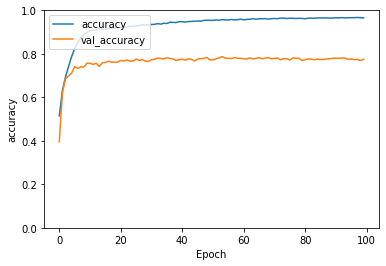

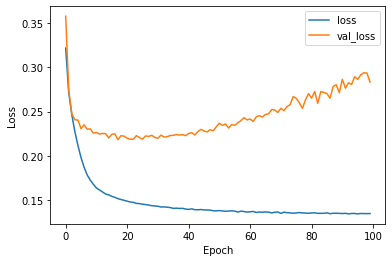

In [12]:
plot_acc_loss(history)

In [13]:
## bespreek de resultaten van deze train

As we saw above, the results are not too great. Therefore we will now try to adjust the settings of the model .

### Model version 2

Now we are going the same as above. So we are going to creat the model, complie it and fit it.

In [14]:
model2 = Sequential(models[1]['layers'], name = models[1]['name'])

In [15]:
model2.summary()

Model: "Version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        36

Perfect! Lets compile 

### Compile and train

In [16]:
compile_model(model2)

In [17]:
# to do: set epoches to 100
history = fit_model(model2, 64, 100, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/100
443/443 - 17s - loss: 0.3298 - accuracy: 0.4830 - val_loss: 0.4043 - val_accuracy: 0.3824
Epoch 2/100
443/443 - 15s - loss: 0.2787 - accuracy: 0.6127 - val_loss: 0.2766 - val_accuracy: 0.6157
Epoch 3/100
443/443 - 14s - loss: 0.2569 - accuracy: 0.6608 - val_loss: 0.2645 - val_accuracy: 0.6213
Epoch 4/100
443/443 - 14s - loss: 0.2420 - accuracy: 0.6981 - val_loss: 0.2455 - val_accuracy: 0.6813
Epoch 5/100
443/443 - 14s - loss: 0.2298 - accuracy: 0.7257 - val_loss: 0.2427 - val_accuracy: 0.6934
Epoch 6/100
443/443 - 15s - loss: 0.2206 - accuracy: 0.7503 - val_loss: 0.2293 - val_accuracy: 0.7171
Epoch 7/100
443/443 - 15s - loss: 0.2121 - accuracy: 0.7713 - val_loss: 0.2245 - val_accuracy: 0.7399
Epoch 8/100
443/443 - 15s - loss: 0.2056 - accuracy: 0.7926 - val_loss: 0.2261 - val_accuracy: 0.7222
Epoch 9/100
443/443 - 15s - loss: 0.1988 - accuracy: 0.8107 - val_loss: 0.2219 - val_accuracy: 0.7506
Epoch 10/100
443/443 - 14s - loss: 0.1925 - accuracy: 0.8275 - val_loss: 0.2196 - 

Epoch 81/100
443/443 - 14s - loss: 0.1382 - accuracy: 0.9507 - val_loss: 0.2476 - val_accuracy: 0.7861
Epoch 82/100
443/443 - 14s - loss: 0.1383 - accuracy: 0.9505 - val_loss: 0.2397 - val_accuracy: 0.7861
Epoch 83/100
443/443 - 14s - loss: 0.1380 - accuracy: 0.9516 - val_loss: 0.2450 - val_accuracy: 0.7836
Epoch 84/100
443/443 - 14s - loss: 0.1386 - accuracy: 0.9521 - val_loss: 0.2449 - val_accuracy: 0.7918
Epoch 85/100
443/443 - 14s - loss: 0.1373 - accuracy: 0.9540 - val_loss: 0.2465 - val_accuracy: 0.7816
Epoch 86/100
443/443 - 14s - loss: 0.1376 - accuracy: 0.9538 - val_loss: 0.2527 - val_accuracy: 0.7808
Epoch 87/100
443/443 - 14s - loss: 0.1383 - accuracy: 0.9536 - val_loss: 0.2493 - val_accuracy: 0.7884
Epoch 88/100
443/443 - 14s - loss: 0.1379 - accuracy: 0.9535 - val_loss: 0.2463 - val_accuracy: 0.7785
Epoch 89/100
443/443 - 14s - loss: 0.1373 - accuracy: 0.9550 - val_loss: 0.2520 - val_accuracy: 0.7777
Epoch 90/100
443/443 - 14s - loss: 0.1376 - accuracy: 0.9560 - val_loss: 

Now we're going to test our model using the test set for the model.

In [18]:
test_loss, test_acc = evaluate_model(model2, x_test, y_test,  64)

56/56 [==============================] - 1s 10ms/step - loss: 0.2610 - accuracy: 0.7785


In [19]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.2610
Test accuracy: 0.7785


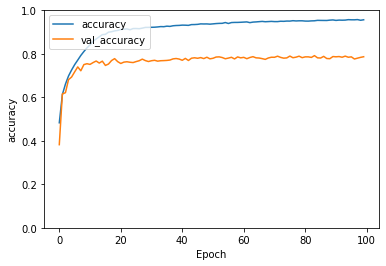

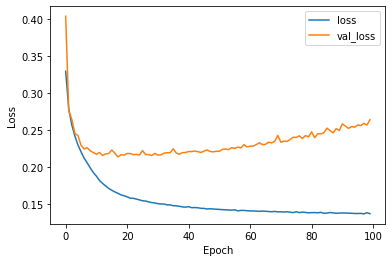

In [20]:
plot_acc_loss(history)

In [21]:
## bespreek de resultaten van deze train

The results are going beter, next we are going to try to add some argumentation to the data. That could help our model to leren more. You can find the file where the data has been argumendated right hier fix it!

## Augment data

We split the data again

In [22]:
datagen,x_train_arg, y_train_arg, x_val_arg, y_val_arg, x_test_arg, y_test_arg = cPickle.load(bz2.BZ2File('ferPlus_augment', 'rb'))

Now we are going to just fit the model using this data.

In [23]:
history = fit_model(model2, 64, 100, True, datagen, x_train, y_train, x_val, y_val, x_test)

Epoch 1/100
443/443 - 16s - loss: 0.2438 - accuracy: 0.7074 - val_loss: 0.2098 - val_accuracy: 0.7718
Epoch 2/100
443/443 - 15s - loss: 0.2238 - accuracy: 0.7385 - val_loss: 0.2063 - val_accuracy: 0.7822
Epoch 3/100
443/443 - 15s - loss: 0.2180 - accuracy: 0.7540 - val_loss: 0.2056 - val_accuracy: 0.7830
Epoch 4/100
443/443 - 14s - loss: 0.2141 - accuracy: 0.7637 - val_loss: 0.2041 - val_accuracy: 0.7864
Epoch 5/100
443/443 - 15s - loss: 0.2117 - accuracy: 0.7706 - val_loss: 0.2045 - val_accuracy: 0.7904
Epoch 6/100
443/443 - 15s - loss: 0.2088 - accuracy: 0.7765 - val_loss: 0.1989 - val_accuracy: 0.7980
Epoch 7/100
443/443 - 15s - loss: 0.2074 - accuracy: 0.7784 - val_loss: 0.2027 - val_accuracy: 0.7923
Epoch 8/100
443/443 - 14s - loss: 0.2059 - accuracy: 0.7854 - val_loss: 0.2020 - val_accuracy: 0.7943
Epoch 9/100
443/443 - 15s - loss: 0.2043 - accuracy: 0.7870 - val_loss: 0.1987 - val_accuracy: 0.8014
Epoch 10/100
443/443 - 14s - loss: 0.2033 - accuracy: 0.7886 - val_loss: 0.1997 - 

Epoch 81/100
443/443 - 14s - loss: 0.1746 - accuracy: 0.8684 - val_loss: 0.1884 - val_accuracy: 0.8312
Epoch 82/100
443/443 - 14s - loss: 0.1745 - accuracy: 0.8697 - val_loss: 0.1860 - val_accuracy: 0.8366
Epoch 83/100
443/443 - 15s - loss: 0.1744 - accuracy: 0.8682 - val_loss: 0.1884 - val_accuracy: 0.8174
Epoch 84/100
443/443 - 15s - loss: 0.1745 - accuracy: 0.8701 - val_loss: 0.1853 - val_accuracy: 0.8377
Epoch 85/100
443/443 - 14s - loss: 0.1737 - accuracy: 0.8703 - val_loss: 0.1865 - val_accuracy: 0.8385
Epoch 86/100
443/443 - 14s - loss: 0.1740 - accuracy: 0.8699 - val_loss: 0.1873 - val_accuracy: 0.8307
Epoch 87/100
443/443 - 15s - loss: 0.1736 - accuracy: 0.8706 - val_loss: 0.1855 - val_accuracy: 0.8284
Epoch 88/100
443/443 - 15s - loss: 0.1736 - accuracy: 0.8685 - val_loss: 0.1882 - val_accuracy: 0.8205
Epoch 89/100
443/443 - 15s - loss: 0.1733 - accuracy: 0.8671 - val_loss: 0.1869 - val_accuracy: 0.8360
Epoch 90/100
443/443 - 15s - loss: 0.1732 - accuracy: 0.8715 - val_loss: 

Now we're going to test our model using the test set for the model.

In [24]:
test_loss, test_acc = evaluate_model(model2, x_test, y_test,  64)

56/56 [==============================] - 1s 10ms/step - loss: 0.1864 - accuracy: 0.8307


In [25]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.1864
Test accuracy: 0.8307


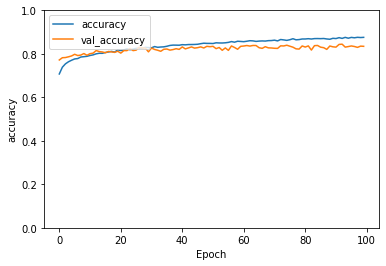

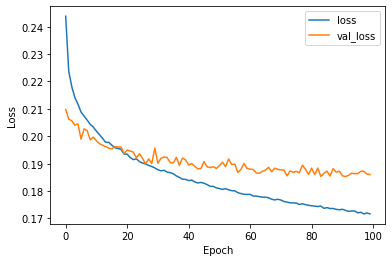

In [26]:
plot_acc_loss(history)

In [28]:
save_all_model(model2, test_acc)

INFO:tensorflow:Assets written to: saved_all_model8306\assets
Model is saved in a file.


In [27]:
## bespreek de resultaten van deze train

## Conclusion
